# Reproducing Figure 2
The first four sections show results for the four case studies. Figure 2 of the paper
shows the data used for these case studies, and the code below reproduces this figure. First, we load
in the packages we need for the plots.

In [1]:
using StepwiseEQL
using CairoMakie
using EpithelialDynamics1D
using OrdinaryDiffEq
using LinearSolve
using Random
using StatsBase

The part of the figure involving the first case study is produced
below.

In [2]:
# Case study 1
fig = Figure(fontsize=81, resolution=(3175, 2760))
force_law = (δ, p) -> p.k * (p.s - δ)
force_law_parameters = (k=50.0, s=0.2)
final_time = 5.0
damping_constant = 1.0
initial_condition = [LinRange(0, 5, 30); LinRange(25, 30, 30)] |> unique!
prob = CellProblem(;
    force_law,
    force_law_parameters,
    final_time,
    damping_constant,
    initial_condition)
sol = solve(prob, Tsit5(), saveat=0.01)
pde = continuum_limit(prob, 2500, proliferation=false)
pde_sol = solve(pde, TRBDF2(linsolve=KLUFactorization()), saveat=sol.t)
q = node_densities.(sol.u)
q_stack = (vec ∘ stack)(q)
r_stack = (vec ∘ stack)(sol.u)
t_stack = repeat(sol.t, inner=length(initial_condition))
times = [0, 1, 2, 3, 4, 5]
colors = (:black, :red, :blue, :green, :orange, :purple)
time_indices = [findlast(≤(τ), sol.t) for τ in times]
ax11 = Axis(fig[1, 1], xlabel=L"x", ylabel=L"t",
    title=L"(a):$ $ Case study 1", titlealign=:left,
    width=1200, height=400,
    xticks=(0:10:30, [L"%$s" for s in 0:10:30]),
    yticks=(0:5, [L"%$s" for s in 0:5]))
ax21 = Axis(fig[1, 2], xlabel=L"x", ylabel=L"q(x, t)",
    title=L"(e):$ $ Case study 1", titlealign=:left,
    width=1200, height=400, halign=:left,
    xticks=(0:10:30, [L"%$s" for s in 0:10:30]),
    yticks=(0:2:6, [L"%$s" for s in 0:2:6]))
linkxaxes!(ax11, ax21)
hm11 = tricontourf!(ax11, r_stack, t_stack, q_stack, levels=0:0.5:6, rasterize=true, extendhigh=:auto)
tightlimits!(ax11)
Colorbar(fig[1, 0], hm11, width=50, flipaxis=false,  label=L"q(x, t)", ticks=(0:2:6, [L"%$s" for s in 0:2:6]), halign=:left)
for (j, i) in enumerate(time_indices)
    lines!(ax21, sol.u[i], q[i], color=colors[j], linewidth=9)
    lines!(ax21, pde.geometry.mesh_points, pde_sol.u[i], color=colors[j], linestyle=:dash, linewidth=20)
end
xlims!(ax21, 0, 30)
tightlimits!(ax11)
tightlimits!(ax21)
ylims!(ax21, 0, 6)
arrows!(ax21, [15.0, 23.0], [0.4, 3.0], [0.0, 4.0], [2.0, -2.0], color=:black, linewidth=8, arrowsize=57)
text!(ax21, [15.7, 28.0], [2.0, 0.7], text=[L"t", L"t"], color=:black, fontsize=81);

The part of the figure involving the second case study is produced
below.

In [3]:
# Case study 2
force_law = (δ, p) -> p.k * (p.s - δ)
force_law_parameters = (k=50.0, s=0.2)
final_time = 100.0
damping_constant = 1.0
initial_condition = LinRange(0, 5, 60) |> collect
prob = CellProblem(;
    force_law,
    force_law_parameters,
    final_time,
    damping_constant,
    initial_condition,
    fix_right=false)
sol = solve(prob, Tsit5(), saveat=0.1)
pde = continuum_limit(prob, 2500, proliferation=false)
pde_sol = solve(pde, TRBDF2(linsolve=KLUFactorization()), saveat=sol.t)
q = node_densities.(sol.u)
q_stack = (vec ∘ stack)(q)
r_stack = (vec ∘ stack)(sol.u)
t_stack = repeat(sol.t, inner=length(initial_condition))
times = [0, 5, 10, 25, 50, 100]
colors = (:black, :red, :blue, :green, :orange, :purple)
time_indices = [findlast(≤(τ), sol.t) for τ in times]
ax11 = Axis(fig[2, 1], xlabel=L"x", ylabel=L"t",
    title=L"(b):$ $ Case study 2", titlealign=:left,
    width=1200, height=400,
    xticks=(0:2:12, [L"%$s" for s in 0:2:12]),
    yticks=(0:20:100, [L"%$s" for s in 0:20:100]))
ax21 = Axis(fig[2, 2], xlabel=L"x", ylabel=L"q(x, t)",
    title=L"(f):$ $ Case study 2", titlealign=:left,
    width=1200, height=400,
    xticks=(0:2:12, [L"%$s" for s in 0:2:12]),
    yticks=(5:4:13, [L"%$s" for s in 5:4:13]))
linkxaxes!(ax11, ax21)
hm11 = tricontourf!(ax11, r_stack, t_stack, q_stack, levels=5:0.5:13, rasterize=true, extendhigh=:auto)
Colorbar(fig[2, 0], hm11,  width=50,flipaxis=false, label=L"q(x, t)", ticks=(5:2:13, [L"%$s" for s in 5:2:13]), halign=:left)
@views for (j, i) in enumerate(time_indices)
    lines!(ax21, sol.u[i], q[i], color=colors[j], linewidth=9)
    lines!(ax21, pde.geometry.mesh_points * pde_sol.u[i][end], pde_sol.u[i][begin:(end-1)], color=colors[j], linestyle=:dash, linewidth=20)
end
lines!(ax11, sol[end, :], sol.t, color=:red, linewidth=16)
tightlimits!(ax11)
tightlimits!(ax21)
ylims!(ax21, 4.5, 13)
xlims!(ax21, 0, 12)
xlims!(ax11, 0, 12)
arrows!(ax21, [6.0], [12.0], [4.0], [-3.0], color=:black, linewidth=8, arrowsize=57)
text!(ax21, [8.0], [11.0], text=L"t", color=:black, fontsize=81);

The part of the figure involving the third case study is produced
below.

In [4]:
# Case study 3
final_time = 50.0
domain_length = 30.0
midpoint = domain_length / 2
initial_condition = [LinRange(0, 5, 30); LinRange(25, 30, 30)] |> unique!
damping_constant = 1.0
resting_spring_length = 0.2
spring_constant = 50.0
k = spring_constant
force_law_parameters = (s=resting_spring_length, k=spring_constant)
force_law = (δ, p) -> p.k * (p.s - δ)
Δt = 1e-2
K = 15.0
β = 0.15
G = (δ, p) -> max(zero(δ), p.β * (one(δ) - inv(p.K * δ)))
Gp = (β=β, K=K)
prob = CellProblem(;
    final_time,
    initial_condition,
    damping_constant,
    force_law,
    force_law_parameters,
    proliferation_law=G,
    proliferation_period=Δt,
    proliferation_law_parameters=Gp)
ens_prob = EnsembleProblem(prob)
Random.seed!(292919)
esol = solve(ens_prob, Tsit5(), EnsembleSerial(); trajectories=1000, saveat=0.1)
pde = continuum_limit(prob, 2500, proliferation=true)
pde_sol = solve(pde, TRBDF2(linsolve=KLUFactorization()), saveat=esol[1].t)
(; q, r, means, lowers, uppers, knots) = node_densities(esol; stat=mean, extrapolate=true)
q_stack = (vec ∘ stack)(means)
r_stack = (vec ∘ stack)(knots)
t_stack = repeat(esol[1].t, inner=length(knots[1]))
times = [0.0, 1.0, 5.0, 10.0, 20.0, 50.0]
colors = (:black, :red, :blue, :green, :orange, :purple)
time_indices = [findlast(≤(τ), esol[1].t) for τ in times]
ax11 = Axis(fig[3, 1], xlabel=L"x", ylabel=L"t",
    title=L"(c):$ $ Case study 3", titlealign=:left,
    width=1200, height=400,
    xticks=(0:10:30, [L"%$s" for s in 0:10:30]),
    yticks=(0:10:50, [L"%$s" for s in 0:10:50]))
ax21 = Axis(fig[3, 2], xlabel=L"x", ylabel=L"q(x, t)",
    title=L"(f):$ $ Case study 3", titlealign=:left,
    width=1200, height=400, halign=:left,
    xticks=(0:10:30, [L"%$s" for s in 0:10:30]),
    yticks=(0:5:15, [L"%$s" for s in 0:5:15]))
linkxaxes!(ax11, ax21)
hm11 = tricontourf!(ax11, r_stack, t_stack, q_stack, levels=0:1:15, rasterize=true, extendhigh=:auto)
tightlimits!(ax11)
Colorbar(fig[3, 0], hm11,  width=50,flipaxis=false, label=L"q(x, t)", ticks=(0:5:15, [L"%$s" for s in 0:5:15]), halign=:left)
for (j, i) in enumerate(time_indices)
    lines!(ax21, knots[i], means[i], color=colors[j], linewidth=9)
    lines!(ax21, pde.geometry.mesh_points, pde_sol.u[i], color=colors[j], linestyle=:dash, linewidth=20)
end
xlims!(ax21, 0, 30)
tightlimits!(ax11)
tightlimits!(ax21)
ylims!(ax21, 0, 15.5)
arrows!(ax21, [15.0], [3.0], [0.0], [7.5], color=:black, linewidth=12, arrowsize=57)
text!(ax21, [15.5], [7.0], text=L"t", color=:black, fontsize=81);

The part of the figure involving the fourth case study is produced
below.

In [5]:
# Case study 4
final_time = 100.0
domain_length = 30.0
midpoint = domain_length / 2
initial_condition = [LinRange(0, 5, 30);] |> unique!
damping_constant = 1.0
resting_spring_length = 0.2
spring_constant = 50.0
k = spring_constant
force_law_parameters = (s=resting_spring_length, k=spring_constant)
force_law = (δ, p) -> p.k * (p.s - δ)
Δt = 1e-2
K = 15.0
β = 0.15
G = (δ, p) -> max(zero(δ), p.β * (one(δ) - inv(p.K * δ)))
Gp = (β=β, K=K)
prob = CellProblem(;
    final_time,
    initial_condition,
    damping_constant,
    force_law,
    force_law_parameters,
    proliferation_law=G,
    proliferation_period=Δt,
    proliferation_law_parameters=Gp,
    fix_right=false)
ens_prob = EnsembleProblem(prob)
Random.seed!(292919)
esol = solve(ens_prob, Tsit5(), EnsembleSerial(); trajectories=100, saveat=0.1)
pde = continuum_limit(prob, 2500, proliferation=true)
pde_sol = solve(pde, TRBDF2(linsolve=KLUFactorization()), saveat=esol[1].t)
(; q, r, means, lowers, uppers, knots) = node_densities(esol, stat=mean, extrapolate=true)
q_stack = (vec ∘ stack)(means)
r_stack = (vec ∘ stack)(knots)
t_stack = repeat(esol[1].t, inner=length(knots[1]))
times = [0.0, 5.0, 10.0, 20.0, 50.0, 100.0]
colors = (:black, :red, :blue, :green, :orange, :purple)
time_indices = [findlast(≤(τ), esol[1].t) for τ in times]
ax11 = Axis(fig[4, 1], xlabel=L"x", ylabel=L"t",
    title=L"(d):$ $ Case study 4", titlealign=:left,
    width=1200, height=400,
    xticks=(0:5:40, [L"%$s" for s in 0:5:40]),
    yticks=(0:25:100, [L"%$s" for s in 0:25:100]))
ax21 = Axis(fig[4, 2], xlabel=L"x", ylabel=L"q(x, t)",
    title=L"(g):$ $ Case study 4", titlealign=:left,
    width=1200, height=400, halign=:left,
    xticks=(0:5:40, [L"%$s" for s in 0:5:40]),
    yticks=(0:5:15, [L"%$s" for s in 0:5:15]))
linkxaxes!(ax11, ax21)
hm11 = tricontourf!(ax11, r_stack, t_stack, q_stack, levels=0:1:15, rasterize=true, extendhigh=:auto)
Colorbar(fig[4, 0], hm11,  width=50,flipaxis=false, label=L"q(x, t)", ticks=(0:5:15, [L"%$s" for s in 0:5:15]), halign=:left)
@views for (j, i) in enumerate(time_indices)
    lines!(ax21, knots[i], means[i], color=colors[j], linewidth=9)
    lines!(ax21, pde.geometry.mesh_points * pde_sol.u[i][end], pde_sol.u[i][begin:(end-1)], color=colors[j], linestyle=:dash, linewidth=20)
end
lines!(ax11, leading_edges(esol).means, esol[1].t, color=:red, linewidth=16)
tightlimits!(ax11)
tightlimits!(ax21)
ylims!(ax21, 0, 15.5)
arrows!(ax21, [13.0], [3.0], [13.0], [0.0], color=:black, linewidth=12, arrowsize=57)
text!(ax21, [22.0], [3.5], text=L"t", fontsize=81);

With all this, we finally obtain the figure.

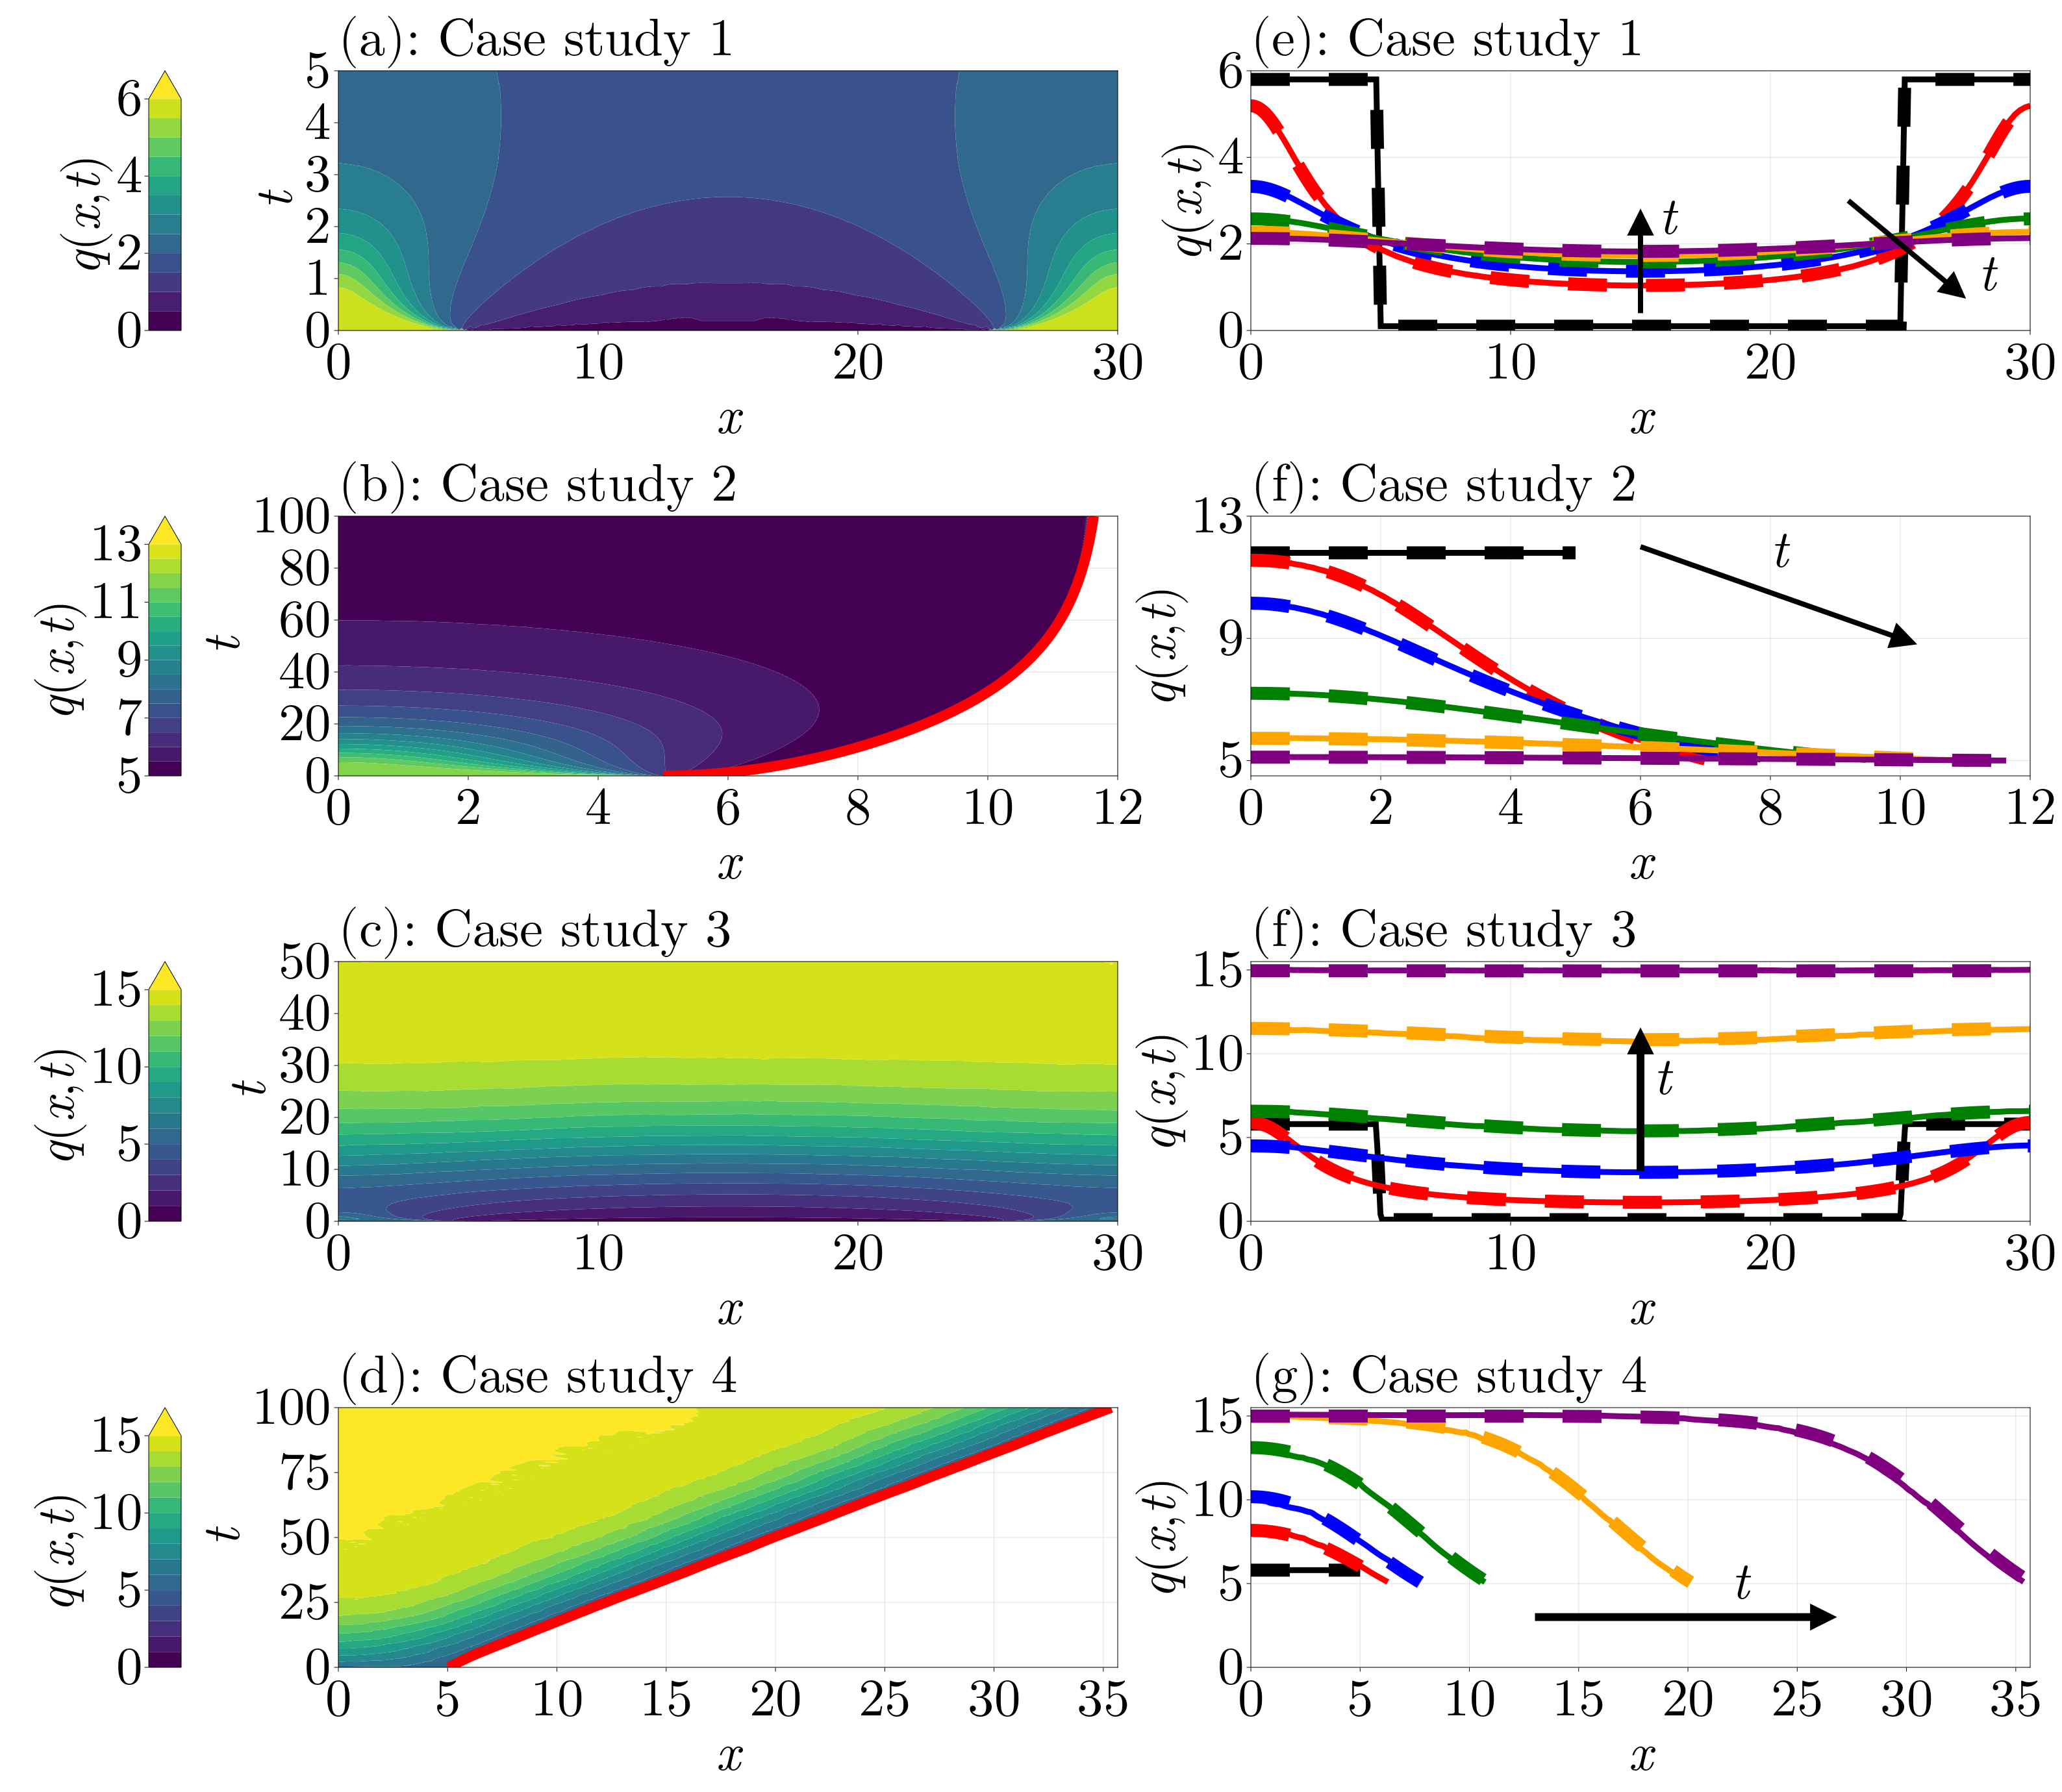

In [6]:
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*